In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\books.csv")

Note: As I was reading csv file through above code. I found that some rows had extra columns(13 columns due to redundant comma marks ' , '). One possible solution could be to drop those rows however as I checked those errors were only 4-5 which were quite manageable so I manually recovered those rows to have more data for analysis.

In [3]:
# Listing all the columns in the file
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [4]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
# Showing count of number of rows and columns in the file 
data.shape

(11127, 12)

In [6]:
#checking if any columns has null value.
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [4]:
# Dropping redundant columns such as bookID, isbn, isbn13, num_pages,publication_date
book = data.drop(['bookID','isbn','isbn13','  num_pages','publication_date'], axis = 1)

In [8]:
book.head()

,title,authors,average_rating,language_code,ratings_count,text_reviews_count,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,2095690,27591,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,2153167,29221,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,6333,244,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,2339585,36325,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,41428,164,Scholastic


In [9]:
book.tail()

,title,authors,average_rating,language_code,ratings_count,text_reviews_count,publisher
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,156,20,Da Capo Press
11123,You Bright and Risen Angels,William T. Vollmann,4.08,eng,783,56,Penguin Books
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,820,95,Penguin Books
11125,Poor People,William T. Vollmann,3.72,eng,769,139,Ecco
11126,Las aventuras de Tom Sawyer,Mark Twain,3.91,spa,113,12,Edimat Libros


In [10]:
# Relationship analysis

In [11]:
# Analyzing heat map

#    A density heat map is used to analyze the areas in a plot where data points are dense or scattered.
#    Heat maps are specifically used where there is a huge data set with overlapping data values. 
#    This helps analysts to see the areas with greater density and discover data trends

<AxesSubplot:>

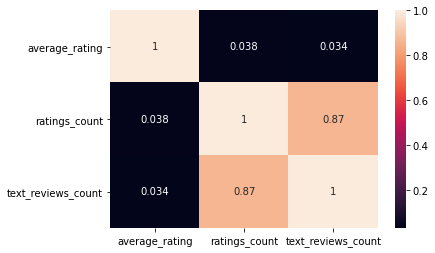

In [12]:
corelation = book.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

Remark: By above heatmap we can conclude that ratings_count and text_reviews_count have a good relation for suggesting books
        to the users based on a books selected by him/her.

In [ ]:
# pairplot - Plot pairwise relationships in a dataset.

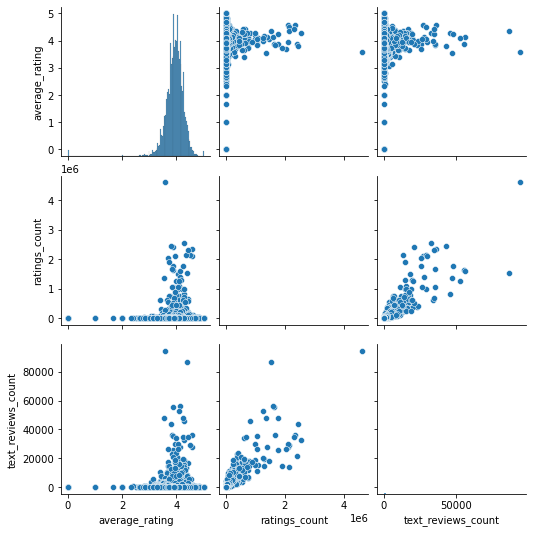

In [14]:
sns.pairplot(book)

Remark : Above pair plots are quite discriptive showing pair wise relations between all the numberical columns. Such as if we
         analyze text_reviews_count and average_rating we can say that books which are most read have average ratings                    of 4 and books with average rating of 2 or less than 2 are not read by majority of people because their                        text_reviwes_count are also low.

In [15]:
# Scattered plot

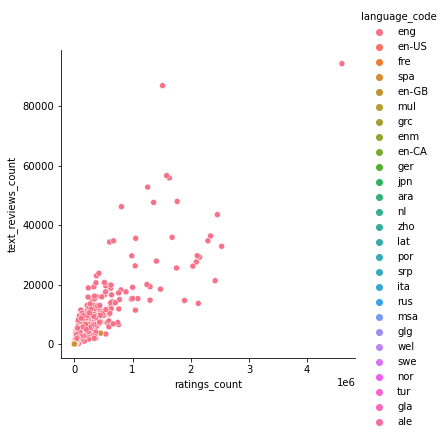

In [16]:
sns.relplot(x = 'ratings_count',y = 'text_reviews_count',hue = 'language_code',data = book)

Remark : By above scatterplot we can conclude that books in english(eng) language is
         most preferred by users followed by en-US, fire, spa then others as shown by above plot

In [5]:
# Counting number of unique entries in each column
book.nunique()

title                 10352
authors                6643
average_rating          209
language_code            27
ratings_count          5294
text_reviews_count     1822
publisher              2292
dtype: int64

In [17]:
book['publisher'].value_counts(ascending=True,dropna=False)

Overeaters Anonymous  Incorporated        1
Fontana Books                             1
Travelers' Tales                          1
De Boekerij                               1
McGraw-Hill Science/Engineering/Math      1
                                       ... 
Ballantine Books                        144
Mariner Books                           150
Penguin Classics                        184
Penguin Books                           261
Vintage                                 318
Name: publisher, Length: 2292, dtype: int64

Remark : Books by vintage publisher is the most popular among readers and books by McGraw-Hill Science/Engineering/Math,
         Overeaters Anonymous  Incorporated,Fontana Books,Travelers' Tales,De Boekerij are least read.    

In [18]:
book['authors'].value_counts(ascending=True,dropna=False)

Gustave Flaubert/Margaret Cohen/Eleanor Marx     1
Emily Blake                                      1
Jim Northrup                                     1
Janet Evanovich/Leanne Banks                     1
Virginia Woolf/Jeanne Schulkind                  1
                                                ..
Agatha Christie                                 33
Orson Scott Card                                35
Rumiko Takahashi                                39
P.G. Wodehouse                                  40
Stephen King                                    40
Name: authors, Length: 6643, dtype: int64

Remark : Books by authors Stephen King and P.G. Wodehousr are the most popular among readers.Books by gustave Flaubert/Margaret          Cohen/Eleanor Marx Emily Blake, Jim Northrup, Janet Evanovich/Leanne Banks, Virginia Woolf/Jeanne Schulkind are least          read.

In [21]:
book['language_code'].value_counts(ascending=True,dropna=False)

glg         1
nor         1
gla         1
nl          1
wel         1
msa         1
srp         1
ara         1
ale         1
tur         1
rus         2
swe         2
enm         3
lat         3
ita         5
en-CA       7
por        10
grc        11
zho        14
mul        19
jpn        46
ger        99
fre       144
en-GB     214
spa       218
en-US    1409
eng      8911
Name: language_code, dtype: int64

Remark : Most of the books read are in eng language followed by en-US then spa and least read books are in tur,ale,ara,srp,msa,wel,nl,gla,nor,glg languages.

In [18]:
# Distribution plots

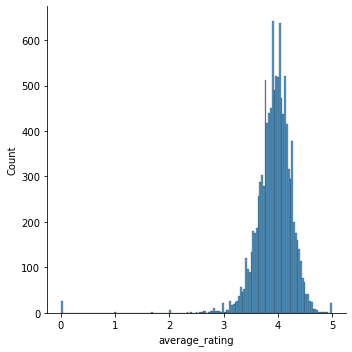

In [5]:
sns.displot(book['average_rating'])

Remark : By above distribution plot we can conclude that average ratings of books is 4(approx).Thus books with ratings 4 could          be more suggested to people.

In [ ]:
# Catplot function provides a new framework giving access to several types of plots that show 
# relationship between numerical variable and one or more categorical variables

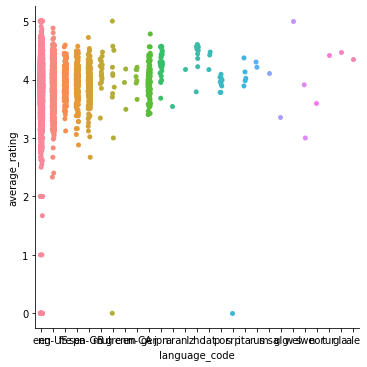

In [31]:
sns.catplot(x='language_code',y='average_rating',data = book)

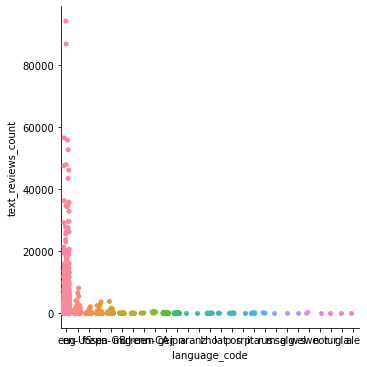

In [7]:
sns.catplot(x='language_code', y='text_reviews_count', 
            data = book,
            jitter = '0.25')

Remark : In above two catplots we can see that the maximum density in the graphs are near eng language and thus eng language books are most preferred and also roughly we can say that average text_reviews_count for eng book are around 10500 and average_rating is around 4

<AxesSubplot:xlabel='language_code', ylabel='count'>

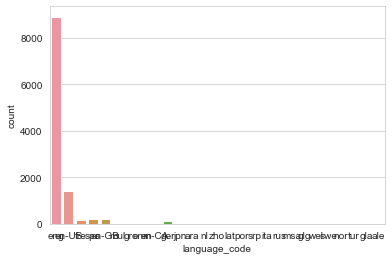

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='language_code',data = book)

Remark: Above countplot shows that 'eng' language books are most popular among readers followed by 'eng-US'.Such plots can help
        to remove the stocks of books which are not popular among readers (based on language of book) and add more books in             stock of most preferred language books to increase sales.